In [1]:
from synthdid.get_data import california_prop99, quota
from synthdid.synthdid import Synthdid
from matplotlib import pyplot as plt
import numpy as np

In [33]:
import pandas as pd

df1 = pd.read_parquet("data/all_forums_weekly_transformed.parquet")

In [28]:
df1 = df1[["forum", "yearweek", "treatment", "log_question_count"]]

In [29]:
df1.to_stata("data/all_forums_weekly_transformed.dta", write_index=False)

In [37]:
df_sdid = (
    Synthdid(df1, "forum", "yearweek", "treatment", "log_question_count")
    .fit()
    .vcov()
    .summary()
)
df_sdid.summary2

,ATT,Std. Err.,t,P>|t|
0,0.08689,0.134173,0.647597,0.517246


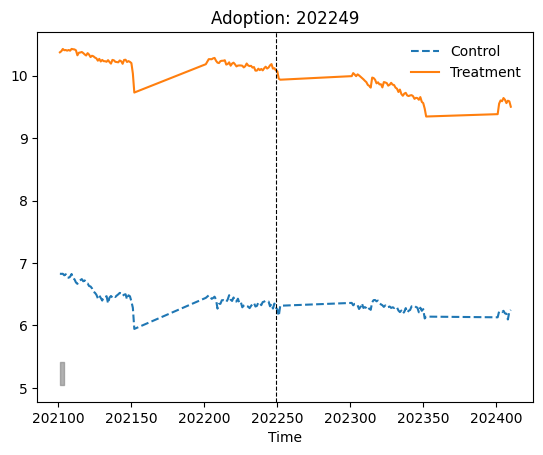

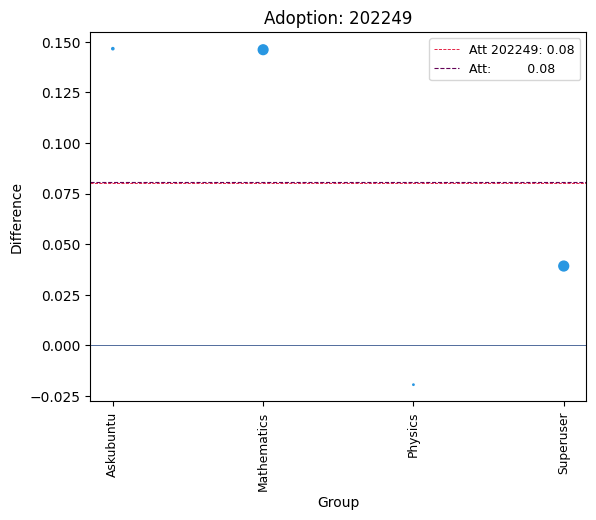

In [35]:
plt.show(df_sdid.plot_outcomes())
plt.show(df_sdid.plot_weights())